# Image pre-processing

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import PIL.Image
import numpy as np
from skimage import data
import torch
import pickle 

from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from skimage.transform import resize
from skimage.morphology import reconstruction

def normalize(data):
    data_max = np.max(data)
    data_min = np.min(data)
    return (data-data_min)/(data_max-data_min)

def deconvolve(data,iterations=3,psf=None):
    if(psf is None):
        psf = np.ones((5, 5)) / 25
    return restoration.richardson_lucy(data, psf, iterations=iterations)

def subtract_background(data):
    image = gaussian_filter(data, 1)
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image
    dilated = reconstruction(seed, mask, method='dilation')
    return data-dilated
    
def show(data):
    plt.imshow(data, cmap='gray')

def crop_in_16(data):    
    width, height = data.shape
    dx = int(0.25*width)
    dy = int(0.25*height)
    img_list = list()
    for nx in range(0,4):
        for ny in range(0,4):
            img.apend(data[nx*dx:(nx+1)*dx,ny*dy:(ny+1)*dy])
    return img_list

def crop_in_4(data):    
    width, height = data.shape
    dx = int(0.5*width)
    dy = int(0.5*height)
    img_list = list()
    for nx in range(0,2):
        for ny in range(0,2):
            img_list.append(data[nx*dx:(nx+1)*dx,ny*dy:(ny+1)*dy])
    return img_list
    
def proprecessing(original_data):
    data = normalize(original_data)
    data = deconvolve(data,iterations=1,psf=np.ones((10, 10)) / 100)
    data = subtract_background(data)
    return normalize(data)

def pipeline(read_dir,write_dir,file_name):
    img_name = read_dir+file_name+'.png'
    img = PIL.Image.open(img_name, mode='r')
    img = img.resize((160,160), resample=PIL.Image.BILINEAR)
    original_data=np.array(img , dtype='float')

    data = normalize(original_data)
    data = deconvolve(data,iterations=1,psf=np.ones((5,5)) / 25)
    data = subtract_background(data)
 
    img_list = crop_in_4(data)
    for i in range(0,len(img_list)):
        img  = normalize(img_list[i])  
        name = write_dir+file_name+"_crop"+str(i+1)+".pkl"
        with open(name, 'wb') as f:
            pickle.dump(img, f, pickle.HIGHEST_PROTOCOL)
    
    return img_list

# TRIAL

In [2]:
read_dir = '/dsde/working/ldalessi/single-cell/MERFISH_dapi_only/'
write_dir = '/dsde/working/ldalessi/single-cell/MERFISH_dapi_only_crops/'
file_name = 'fov_67'


img_list = pipeline(read_dir,write_dir,file_name)

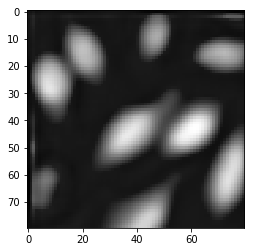

In [3]:
show(img_list[0])

# APPLY THE SAME PROCESSING TO ALL FILES

In [4]:
read_dir = '/dsde/working/ldalessi/single-cell/MERFISH_dapi_only/'
write_dir = '/dsde/working/ldalessi/single-cell/MERFISH_dapi_only_crops/'
file_name = 'fov_67'


list_of_files = list()
for file in os.listdir(read_dir):
    if file.endswith(".png") and file.startswith("fov_"):
        list_of_files.append(file.strip(".png"))
        
print(list_of_files)
print(len(list_of_files))

['fov_50', 'fov_68', 'fov_367', 'fov_102', 'fov_268', 'fov_295', 'fov_130', 'fov_43', 'fov_223', 'fov_184', 'fov_320', 'fov_348', 'fov_189', 'fov_408', 'fov_159', 'fov_475', 'fov_218', 'fov_73', 'fov_234', 'fov_203', 'fov_124', 'fov_317', 'fov_368', 'fov_145', 'fov_433', 'fov_190', 'fov_209', 'fov_128', 'fov_447', 'fov_23', 'fov_239', 'fov_70', 'fov_4', 'fov_167', 'fov_323', 'fov_352', 'fov_154', 'fov_192', 'fov_351', 'fov_334', 'fov_324', 'fov_282', 'fov_436', 'fov_58', 'fov_171', 'fov_42', 'fov_360', 'fov_119', 'fov_44', 'fov_255', 'fov_34', 'fov_92', 'fov_420', 'fov_108', 'fov_468', 'fov_161', 'fov_242', 'fov_473', 'fov_86', 'fov_10', 'fov_166', 'fov_349', 'fov_382', 'fov_340', 'fov_140', 'fov_321', 'fov_297', 'fov_67', 'fov_404', 'fov_419', 'fov_403', 'fov_457', 'fov_105', 'fov_347', 'fov_476', 'fov_485', 'fov_342', 'fov_153', 'fov_456', 'fov_364', 'fov_3', 'fov_458', 'fov_315', 'fov_99', 'fov_338', 'fov_422', 'fov_355', 'fov_356', 'fov_72', 'fov_392', 'fov_264', 'fov_427', 'fov_24

In [5]:
write_dir

'/dsde/working/ldalessi/single-cell/MERFISH_dapi_only_crops/'

In [16]:
list_of_files_already_processed = list()
for file in os.listdir(write_dir):
    #print(file)
    tmp = file.split("_c")[0]
    list_of_files_already_processed.append(tmp)
        
print(list_of_files_already_processed)

['fov_117', 'fov_229', 'fov_323', 'fov_164', 'fov_356', 'fov_21', 'fov_261', 'fov_390', 'fov_59', 'fov_448', 'fov_352', 'fov_97', 'fov_286', 'fov_173', 'fov_452', 'fov_468', 'fov_466', 'fov_130', 'fov_61', 'fov_323', 'fov_192', 'fov_6', 'fov_92', 'fov_244', 'fov_3', 'fov_266', 'fov_451', 'fov_124', 'fov_152', 'fov_58', 'fov_152', 'fov_382', 'fov_55', 'fov_411', 'fov_140', 'fov_12', 'fov_343', 'fov_214', 'fov_288', 'fov_184', 'fov_396', 'fov_335', 'fov_322', 'fov_296', 'fov_91', 'fov_124', 'fov_337', 'fov_89', 'fov_38', 'fov_41', 'fov_136', 'fov_217', 'fov_40', 'fov_436', 'fov_50', 'fov_91', 'fov_105', 'fov_349', 'fov_278', 'fov_348', 'fov_223', 'fov_324', 'fov_38', 'fov_102', 'fov_305', 'fov_475', 'fov_301', 'fov_368', 'fov_412', 'fov_351', 'fov_464', 'fov_364', 'fov_70', 'fov_332', 'fov_364', 'fov_192', 'fov_82', 'fov_2', 'fov_208', 'fov_324', 'fov_53', 'fov_121', 'fov_304', 'fov_131', 'fov_360', 'fov_246', 'fov_232', 'fov_100', 'fov_385', 'fov_167', 'fov_215', 'fov_331', 'fov_457', '

In [21]:
a=list()
for file_name in list_of_files:
    if(not (str(file_name) in list_of_files_already_processed)):
        print(file_name)
        a.append(file_name)
        _ = pipeline(read_dir,write_dir,file_name)

print(len(a))

fov_491
fov_386
fov_201
fov_262
fov_96
fov_454
fov_253
fov_9
fov_48
fov_250
fov_64
fov_78
fov_358
fov_437
fov_293
fov_157
fov_300
fov_187
fov_373
fov_372
fov_256
fov_292
fov_62
fov_118
fov_95
fov_276
fov_490
fov_325
fov_47
fov_399
fov_279
fov_281
fov_80
fov_441
fov_345
fov_69
fov_478
fov_391
fov_210
fov_176
fov_465
fov_111
fov_122
fov_74
fov_483
fov_383
fov_37
fov_36
fov_450
fov_369
fov_414
fov_149
fov_243
fov_185
fov_150
fov_416
fov_434
fov_196
fov_284
fov_110
fov_299
fov_206
fov_313
fov_303
fov_426
fov_81
fov_20
fov_162
fov_354
fov_172
fov_137
fov_405
fov_221
fov_237
fov_366
fov_406
fov_1
fov_143
fov_393
fov_120
fov_481
fov_365
fov_294
fov_455
fov_395
fov_314
fov_174
fov_389
fov_357
fov_267
fov_57
fov_205
fov_329
fov_319
fov_344
fov_116
fov_146
fov_129
fov_194
fov_421
fov_76
fov_204
fov_115
fov_330
fov_428
fov_492
fov_423
fov_306
fov_249
fov_394
fov_163
fov_93
fov_489
fov_311
fov_484
fov_346
fov_84
fov_289
fov_77
fov_350
fov_56
fov_417
fov_307
fov_318
fov_371
fov_11
fov_298
fov_387
f

# Create two big torch.tensor (train and test datasets)

In [25]:
dir_with_crops = write_dir
list_of_pkl_files = list()
for file in os.listdir(dir_with_crops):
    if file.endswith(".pkl") and file.startswith("fov_"):
        list_of_pkl_files.append(file.strip(".pkl"))

N=len(list_of_pkl_files)
N_TRAIN = int(0.15*N)
N_TEST = N-N_TRAIN

dataset_train = torch.zeros([N_TRAIN,1,80,80], dtype=torch.float)
dataset_test  = torch.zeros([N_TEST,1,80,80], dtype=torch.float)

for n in range(0,N):
    file_name=list_of_pkl_files[n]
    with open(dir_with_crops + file_name + '.pkl', 'rb') as f:
        img = pickle.load(f)
        if(n<N_TRAIN):
            dataset_train[n,0,...] = torch.from_numpy(img).float()
        else:
            dataset_test[n-N_TRAIN,0,...] = torch.from_numpy(img).float()
        
with open(dir_with_crops + "DAPI_dataset_train" + '.pkl', 'wb') as f:
    pickle.dump(dataset_train, f, pickle.HIGHEST_PROTOCOL)
with open(dir_with_crops + "DAPI_dataset_test" + '.pkl', 'wb') as f:
    pickle.dump(dataset_test, f, pickle.HIGHEST_PROTOCOL)